In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans


In [2]:
data= pd.read_csv(r'C:\Users\HP\Desktop\Desktop\[FreeCourseLab.com] Udemy - The Data Science Course 2019 Complete Data Science Bootcamp\31. Advanced Statistical Methods - K-Means Clustering\15.1 iris_dataset.csv.csv')
data

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


Text(0, 0.5, 'petal_length')

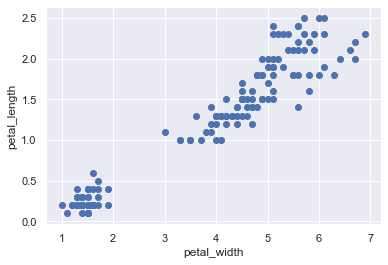

In [3]:
plt.scatter(data['petal_length'],data['petal_width'])
plt.xlabel('petal_width')
plt.ylabel('petal_length')

In [4]:
x= data.copy()

In [5]:
kmeans= KMeans(2)
kmeans= kmeans.fit(x)
kmeans

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [6]:
clusters=x.copy()
clusters['clusters_perd']= kmeans.fit_predict(x)
clusters

,sepal_length,sepal_width,petal_length,petal_width,clusters_perd
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0
146,6.3,2.5,5.0,1.9,0
147,6.5,3.0,5.2,2.0,0
148,6.2,3.4,5.4,2.3,0


Text(0, 0.5, 'petal_length')

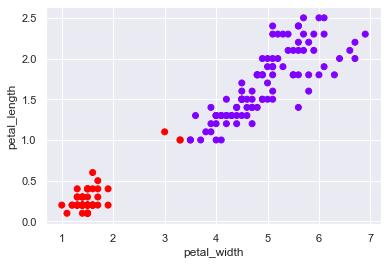

In [7]:
plt.scatter(clusters['petal_length'],clusters['petal_width'],c=clusters['clusters_perd'],cmap='rainbow')
plt.xlabel('petal_width')
plt.ylabel('petal_length')

In [8]:
# standardized varable

In [9]:
from sklearn import preprocessing
x_scaled= preprocessing.scale(x)
x_scaled

array([[-9.00681170e-01,  1.03205722e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00, -1.24957601e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.38535265e+00,  3.37848329e-01, -1.39813811e+00,
        -1.31297673e+00],
       [-1.50652052e+00,  1.06445364e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.02184904e+00,  1.26346019e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-5.37177559e-01,  1.95766909e+00, -1.17067529e+00,
        -1.05003079e+00],
       [-1.50652052e+00,  8.00654259e-01, -1.34127240e+00,
        -1.18150376e+00],
       [-1.02184904e+00,  8.00654259e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.74885626e+00, -3.56360566e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00,  1.06445364e-01, -1.28440670e+00,
        -1.44444970e+00],
       [-5.37177559e-01,  1.49486315e+00, -1.28440670e+00,
        -1.31297673e+00],
       [-1.26418478e+00,  8.00654259e-01, -1.22754100e+00,
      

In [10]:
wcss=[]

for i in range (1,10):
    kmeans=KMeans(i)
    kmeans.fit(x)
    wcss_iter=kmeans.inertia_
    wcss.append(wcss_iter)
    
wcss

[680.8244,
 152.36870647733906,
 78.94084142614602,
 57.31787321428571,
 46.53558205128205,
 38.95701115711985,
 34.198464618714624,
 30.209244428234708,
 28.115534535639803]

Text(0, 0.5, 'wcss')

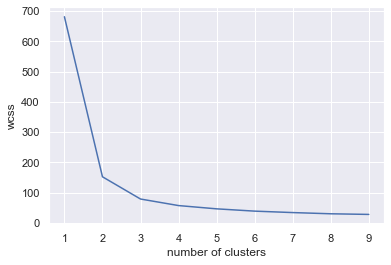

In [11]:
plt.plot(range(1,10),wcss)
plt.xlabel('number of clusters')
plt.ylabel('wcss')

In [12]:
kmeans_new= KMeans(3)
kmeans_new.fit(x_scaled)
clusters_new= x.copy()
clusters_new['clusters_pred']=kmeans_new.fit_predict(x_scaled)
clusters_new

,sepal_length,sepal_width,petal_length,petal_width,clusters_pred
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,1
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,1
148,6.2,3.4,5.4,2.3,1


Text(0, 0.5, 'petal_length')

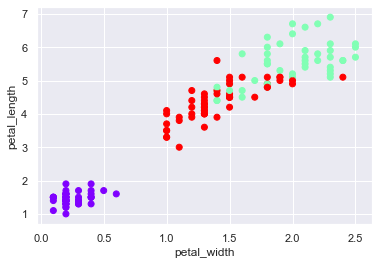

In [13]:
plt.scatter(clusters_new['petal_width'],clusters_new['petal_length'],c=clusters_new['clusters_pred'],cmap='rainbow')
plt.xlabel('petal_width')
plt.ylabel('petal_length')